In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [3]:
df_train = pd.read_csv("/content/twitter_training.csv", header=None)
df_val = pd.read_csv("/content/twitter_validation.csv", header=None)

In [4]:
# Assign column names
df_train.columns = ["ID", "Entity", "Sentiment", "Text"]
df_val.columns = ["ID", "Entity", "Sentiment", "Text"]

# Keep relevant columns & drop missing values
df_train = df_train[["Text", "Sentiment"]].dropna()
df_val = df_val[["Text", "Sentiment"]].dropna()


In [5]:
# Convert Sentiment to lowercase for consistency
df_train["Sentiment"] = df_train["Sentiment"].str.lower()
df_val["Sentiment"] = df_val["Sentiment"].str.lower()

# Combine train and validation datasets
df = pd.concat([df_train, df_val])

In [6]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment analysis
df["Polarity"] = df["Text"].apply(get_sentiment)

<ipython-input-7-7d4c911ed640>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", order=df["Sentiment"].value_counts().index, palette="coolwarm")


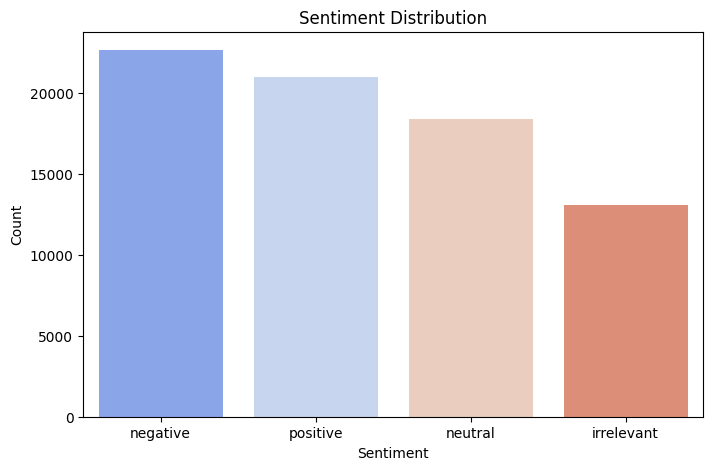

In [7]:
# 📊 **1. Bar Plot of Sentiment Distribution**
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sentiment", order=df["Sentiment"].value_counts().index, palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

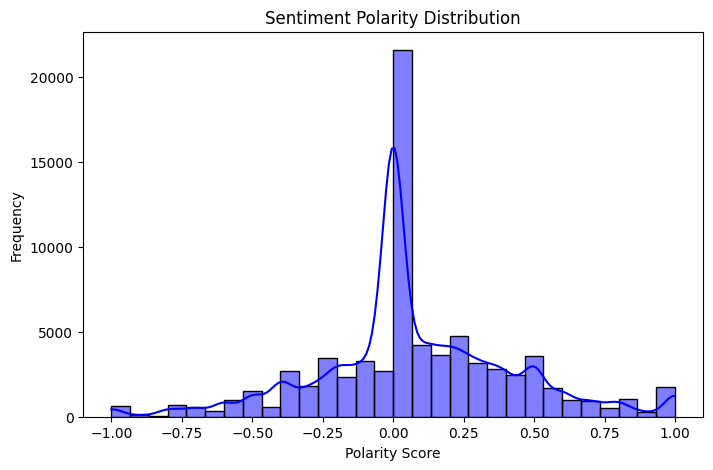

In [8]:
# 📊 **2. Histogram of Sentiment Polarity**
plt.figure(figsize=(8, 5))
sns.histplot(df["Polarity"], bins=30, kde=True, color="blue")
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()

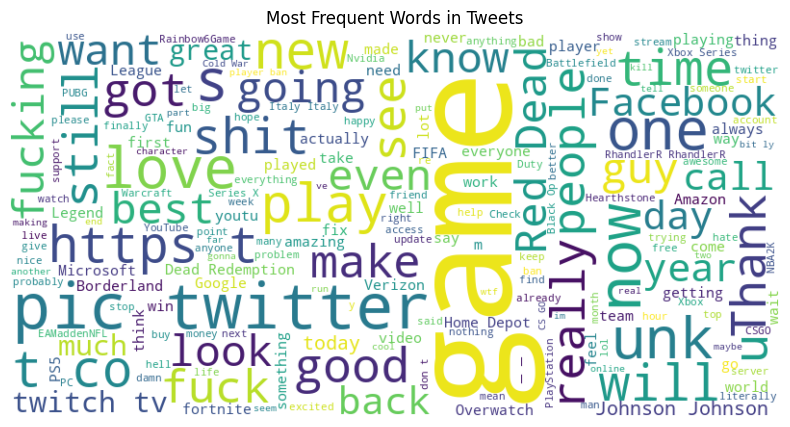

In [9]:
# ☁ **3. Word Cloud for Most Frequent Words**
text_data = " ".join(df["Text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Tweets")
plt.show()